# **END TO END MACHINE LEARNING PROJECT**
#### This model predicts profits of a company in the states California,New York and Florida based on different features




## **GET THE DATA**
#### 1000_Companies.csv is downloaded from kaggle which includes about the investments in the departments R&D,Administration and Marketing and the profits based on the investments

In [139]:
#GET THE DATA

import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\Tarun\Downloads\1000_Companies.csv")

In [140]:
df.info()

df.head()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000




### **DATA CLEANING**
The given dataset doesn't contain any missing 

In [141]:
#DATA CLEANING

print(df.isnull().any())

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool


### DATA VISUALIZATION
Using matplotlib and seaborn to visualize data to gain insights about the dataset.
Using correlation we can know the relation between the features and understand more about the dataset

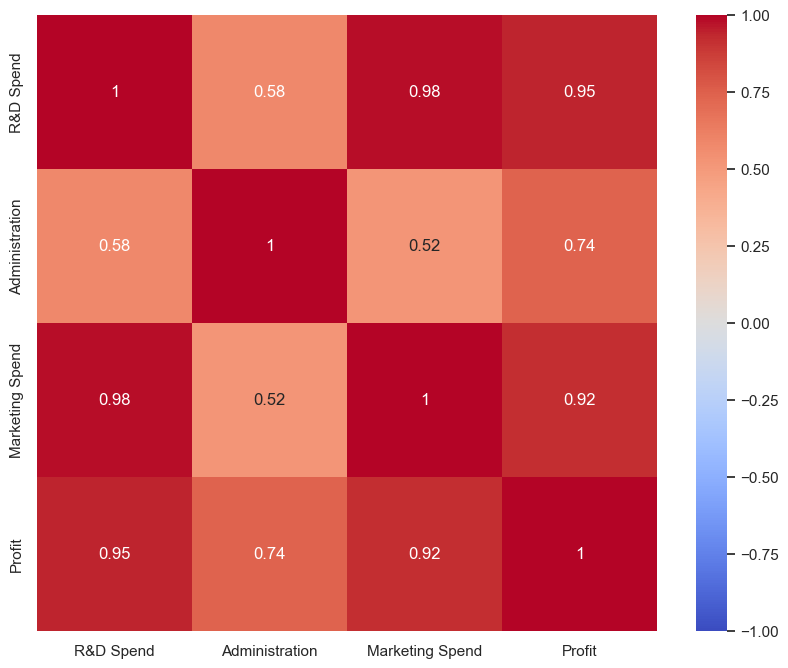

In [142]:
#DATA VISUALIZATION

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

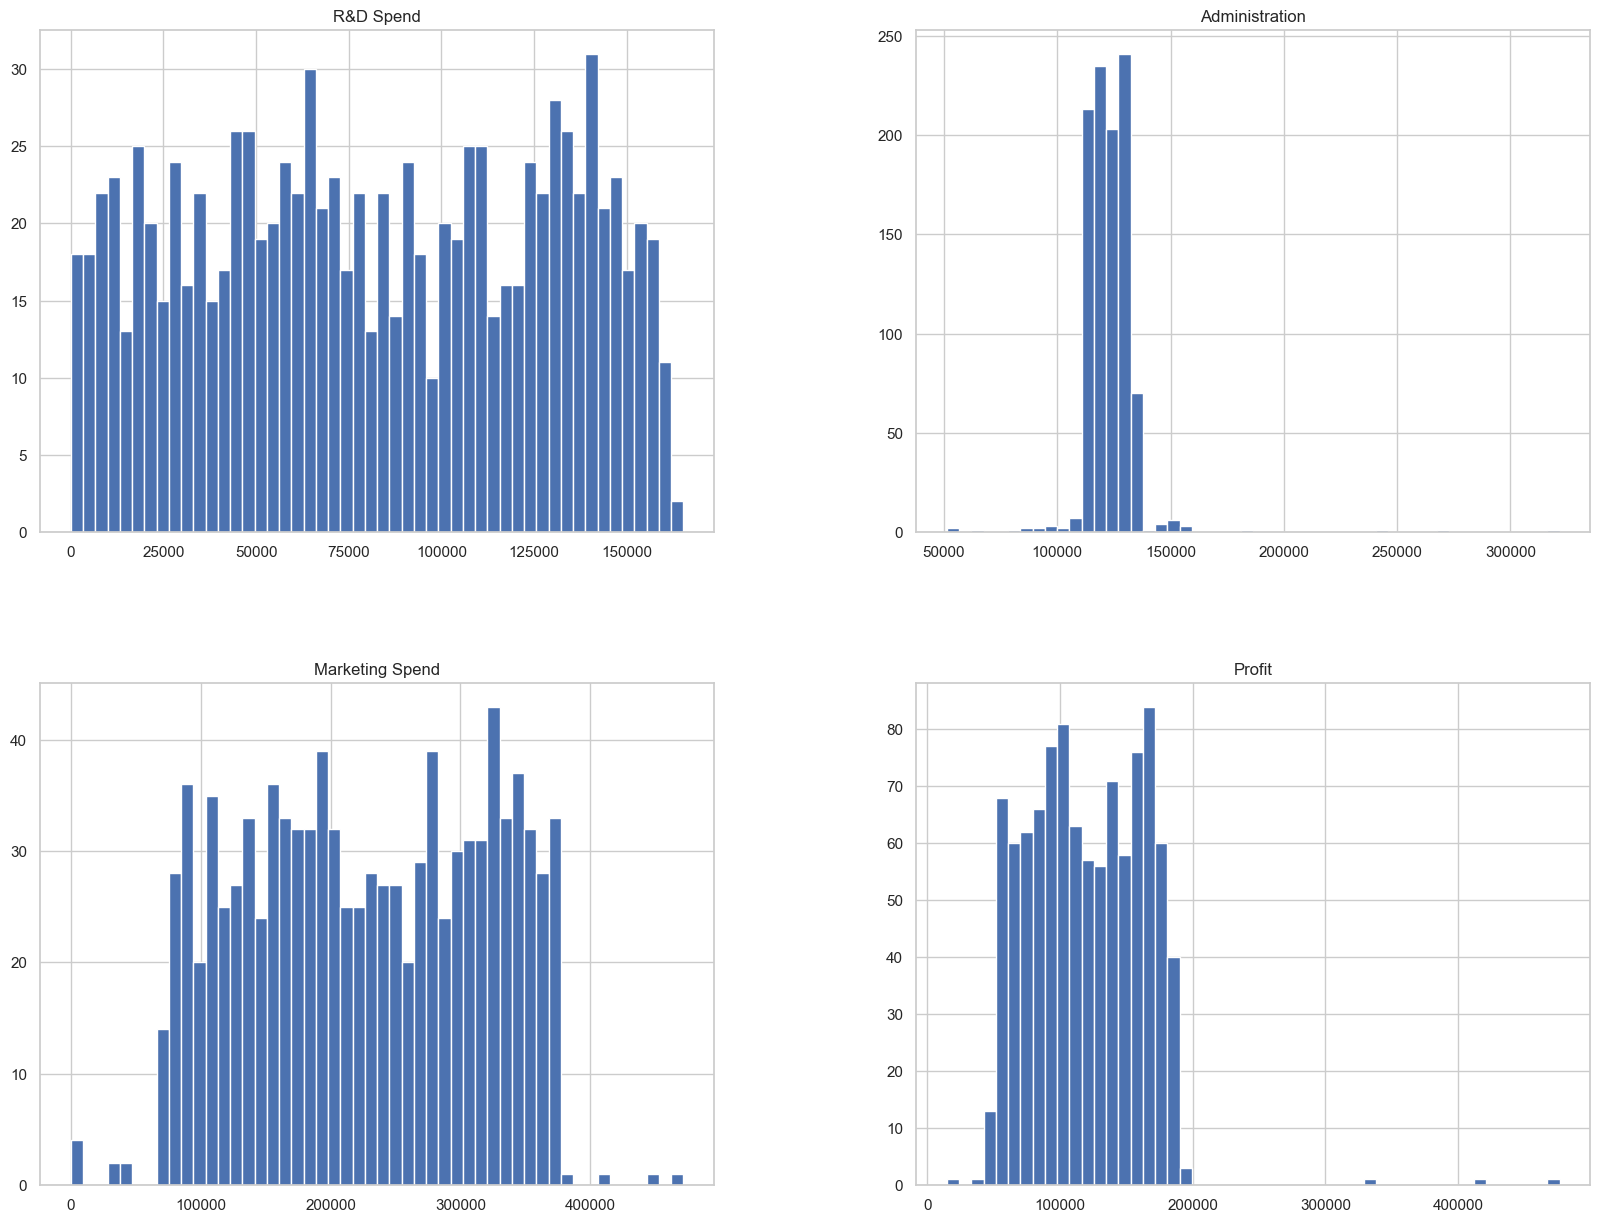

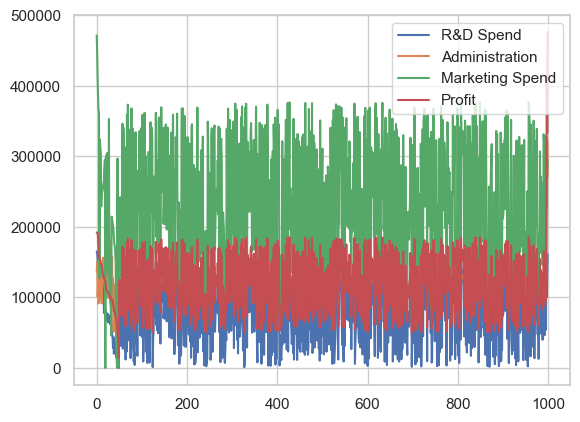

In [143]:
%matplotlib inline 
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
df.plot()
plt.show()

array([[<Axes: xlabel='R&D Spend', ylabel='R&D Spend'>,
        <Axes: xlabel='Administration', ylabel='R&D Spend'>,
        <Axes: xlabel='Marketing Spend', ylabel='R&D Spend'>],
       [<Axes: xlabel='R&D Spend', ylabel='Administration'>,
        <Axes: xlabel='Administration', ylabel='Administration'>,
        <Axes: xlabel='Marketing Spend', ylabel='Administration'>],
       [<Axes: xlabel='R&D Spend', ylabel='Marketing Spend'>,
        <Axes: xlabel='Administration', ylabel='Marketing Spend'>,
        <Axes: xlabel='Marketing Spend', ylabel='Marketing Spend'>]],
      dtype=object)

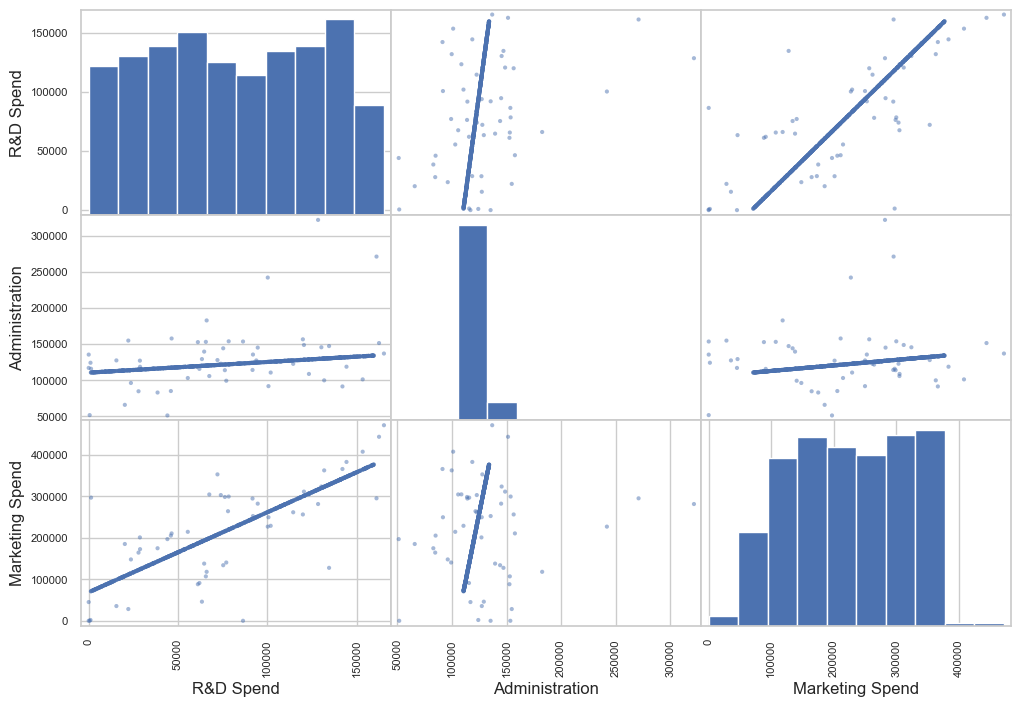

In [144]:
from pandas.plotting import scatter_matrix

attributes = ["R&D Spend","Administration","Marketing Spend","State"]
scatter_matrix(df[attributes], figsize=(12, 8))

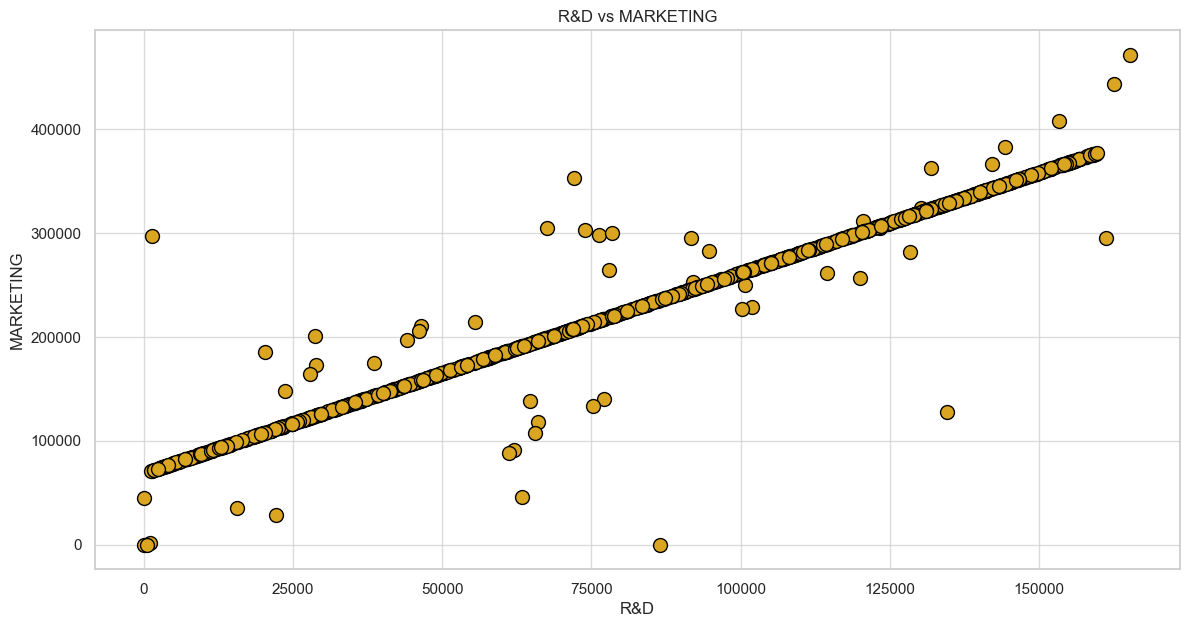

In [145]:
plt.figure(figsize=(14,7))
x=df['R&D Spend']
y=df['Marketing Spend']
plt.scatter(x,y,color='goldenrod', edgecolor='black', s=100)
plt.xlabel('R&D')
plt.ylabel('MARKETING')
plt.title('R&D vs MARKETING')
plt.grid(True, alpha=0.7)
plt.show()

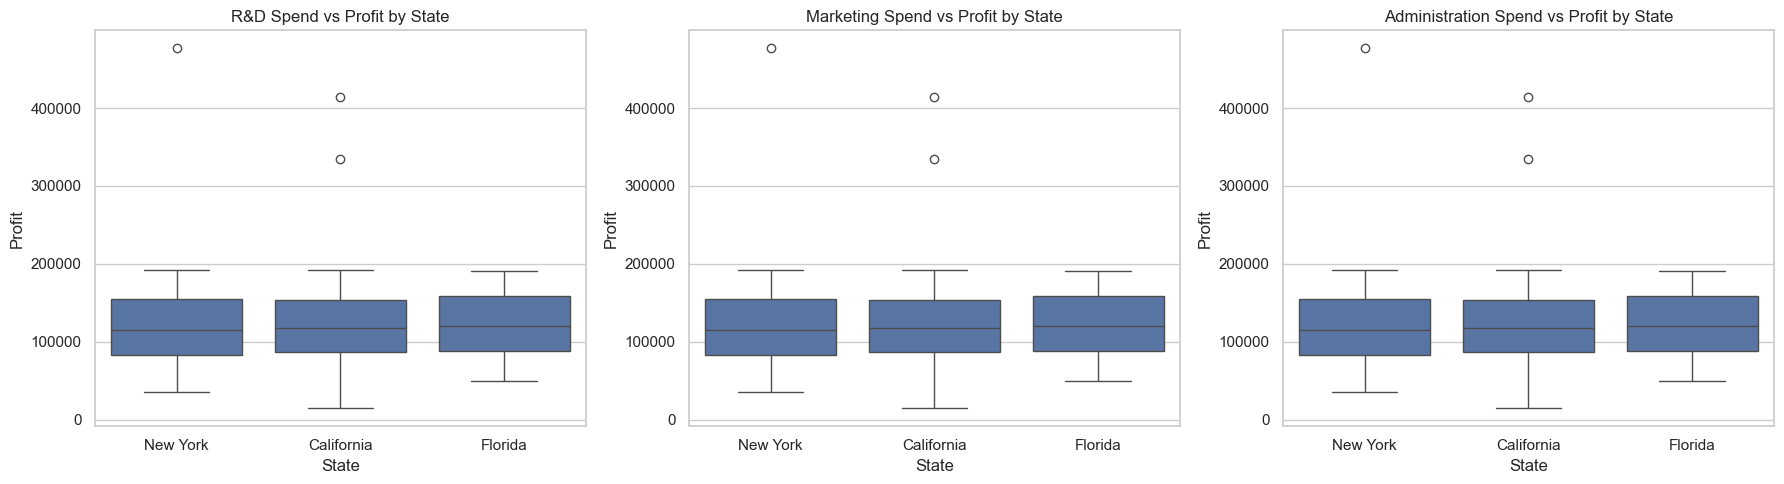

In [146]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R&D Spend vs Profit
sns.boxplot(x='State', y='Profit', data=df, ax=axes[0])
axes[0].set_title('R&D Spend vs Profit by State')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Profit')

# Marketing Spend vs Profit
sns.boxplot(x='State', y='Profit', data=df, ax=axes[1])
axes[1].set_title('Marketing Spend vs Profit by State')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Profit')

# Administration Spend vs Profit
sns.boxplot(x='State', y='Profit', data=df, ax=axes[2])
axes[2].set_title('Administration Spend vs Profit by State')
axes[2].set_xlabel('State')
axes[2].set_ylabel('Profit')

# Adjust layout
plt.tight_layout()
plt.show()


Column names in the DataFrame:
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


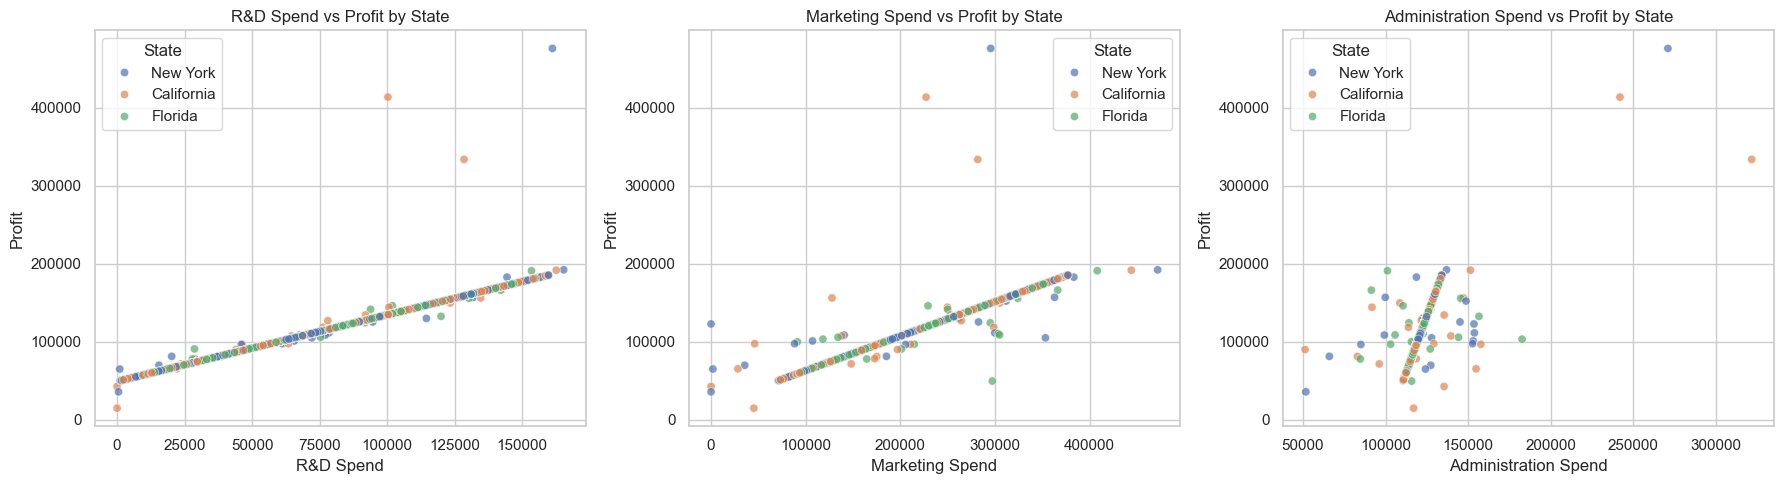

In [147]:

import seaborn as sns

# Print the column names to verify
print("Column names in the DataFrame:")
print(df.columns)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R&D Spend vs Profit
sns.scatterplot(x='R&D Spend', y='Profit', hue='State', data=df, ax=axes[0], alpha=0.7)
axes[0].set_title('R&D Spend vs Profit by State')
axes[0].set_xlabel('R&D Spend')
axes[0].set_ylabel('Profit')

# Marketing Spend vs Profit
sns.scatterplot(x='Marketing Spend', y='Profit', hue='State', data=df, ax=axes[1], alpha=0.7)
axes[1].set_title('Marketing Spend vs Profit by State')
axes[1].set_xlabel('Marketing Spend')
axes[1].set_ylabel('Profit')

# Administration Spend vs Profit
sns.scatterplot(x='Administration', y='Profit', hue='State', data=df, ax=axes[2], alpha=0.7)
axes[2].set_title('Administration Spend vs Profit by State')
axes[2].set_xlabel('Administration Spend')
axes[2].set_ylabel('Profit')

# Adjust layout
plt.tight_layout()
plt.show()

### **Handling Text and Categorical Attributes**
Regression model cannot handle text and categorical attributes. These columns should be conver
ted into numerical type. For that purpose,Scikit-Learn’s OrdinalEncoder class is used. Each cateogry will be assigned a nummber.


In [148]:
com_state=df[['State']]
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
state_enc = ordinal_encoder.fit_transform(com_state)
df['State_Enc'] = state_enc

state_enc[:10]
print(df.columns)
state_enc[:10]
df.head()


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit',
       'State_Enc'],
      dtype='object')


,R&D Spend,Administration,Marketing Spend,State,Profit,State_Enc
0,165349.20,136897.80,471784.10,New York,192261.83,2.0
1,162597.70,151377.59,443898.53,California,191792.06,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,1.0
3,144372.41,118671.85,383199.62,New York,182901.99,2.0
4,142107.34,91391.77,366168.42,Florida,166187.94,1.0


### **TRANSFORMATION PIPELINES**
##### Pipelines are used to make sure that all the preprocessing tranformations are applied in a sequential order. Pipelines allow reusability.Whenever the same tranformations are to be applied the defined pipelines can be reused.


### **FEATURE SCALING**
##### Feature scaling is an important aspect.  Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. StandardScaler is used here which focuses on making the attribute value centered around 0 by making the mean of the values 0 and standard deviation 1.

In [149]:
# Create a pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Feature scaling
    ('rf', RandomForestRegressor())  # Model
])

## SPLITTING DATA INTO TRAINING AND TESTING SETS
StratifiedShuffleSplit is used for splitting the dataset into training and test sets randomly and makes sure that all kinds of an attribute are representing the data in both training and testing sets.

In [150]:
from sklearn.model_selection import StratifiedShuffleSplit
# Initialize StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split using 'State_Enc' for stratification
for train_index, test_index in split.split(df, df['State_Enc']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# Check the sizes of the datasets
print(f"Training set size: {len(strat_train_set)}")
print(f"Test set size: {len(strat_test_set)}")

# Check distribution of 'State_Enc' in the training set
print("\nTraining set 'State_Enc' distribution:")
print(strat_train_set['State_Enc'].value_counts(normalize=True))

# Check distribution of 'State_Enc' in the test set
print("\nTest set 'State_Enc' distribution:")
print(strat_test_set['State_Enc'].value_counts(normalize=True))

Training set size: 800
Test set size: 200

Training set 'State_Enc' distribution:
State_Enc
0.0    0.34375
2.0    0.33375
1.0    0.32250
Name: proportion, dtype: float64

Test set 'State_Enc' distribution:
State_Enc
0.0    0.345
2.0    0.335
1.0    0.320
Name: proportion, dtype: float64


## MODEL TRAINING 
##### Regression is used in this model to train the dataset and predict the target values. Train using different methods and evalute their mean square eroor and R^2 error to compare and choose the best model. 

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the training and testing sets
X_train = strat_train_set.drop(['Profit', 'State'], axis=1)  # Exclude 'Profit' and 'State'
y_train = strat_train_set['Profit']  # Target variable

X_test = strat_test_set.drop(['Profit', 'State'], axis=1)  # Exclude 'Profit' and 'State'
y_test = strat_test_set['Profit']  # Target variable



In [152]:


models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  R-squared: {r2}\n")

Linear Regression:
  Mean Squared Error: 200608455.49066705
  R-squared: 0.9086381913162921

Decision Tree:
  Mean Squared Error: 494926741.5510859
  R-squared: 0.7745987218562435

Random Forest:
  Mean Squared Error: 168302472.71303475
  R-squared: 0.9233510956684545

Gradient Boosting:
  Mean Squared Error: 362877159.99274963
  R-squared: 0.8347372069344942



##### Out of the models used, RandomForrestRegressor has lower mse and better r^2 values

In [153]:
#USING RANDOMFORESTREGRESSOR 

# Train Random Forest and evaluate
rf_model = RandomForestRegressor()
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = pipeline.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"  Mean Squared Error: {mse_rf}")
print(f"  R-squared: {r2_rf}\n")



new_data = {
    'R&D Spend': [120542.52, 250000],  # Example values
    'Administration': [148718.95, 6000],  # Example values
    'Marketing Spend': [311613.29, 400000],  # Example values
    'State_Enc': [1, 1]  # Replace with correct encoded values based on your original state encoding
}

new_df = pd.DataFrame(new_data)

# Predict profit using the trained Random Forest model
predicted_profit_rf = pipeline.predict(new_df)

# Display the predicted profits
print("Predicted Profits using Random Forest:", predicted_profit_rf)

Random Forest:
  Mean Squared Error: 162734661.68137807
  R-squared: 0.9258868077600364

Predicted Profits using Random Forest: [154258.764312 205651.968523]


## FINETUNING 
Fine-tuning adjusts a model’s hyperparameters to improve its performance. RandomizedSearchCV is a method to find the best hyperparameters by randomly sampling from a specified range, making the process faster than trying every combination. 

In [154]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_features': ['sqrt', 'log2'],  # Remove 'auto'
    'max_depth': [None] + list(np.arange(1, 20)),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5)
}

# Create a RandomForestRegressor instance
rf_model = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=100,  # Adjust based on your computational budget
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    random_state=42
)

# Fit the RandomizedSearchCV model to the training data
random_search.fit(X_train, y_train)

# Get the best estimator from the random search
best_rf_model = random_search.best_estimator_

# Make predictions using the best random search model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Random Forest with RandomizedSearchCV:")
print(f"  Mean Squared Error: {mse}")
print(f"  R-squared: {r2}\n")


Random Forest with RandomizedSearchCV:
  Mean Squared Error: 284687106.8589304
  R-squared: 0.870346796061276



In [156]:
# Predict new profit values
new_data = {
    'R&D Spend': [120542.52, 250000],
    'Administration': [148718.95, 6000],
    'Marketing Spend': [311613.29, 400000],
    'State_Enc': [1, 1]  # Example encoded values
}

new_df = pd.DataFrame(new_data)
predicted_profit_rf = pipeline.predict(new_df)

print("Predicted Profits using Random Forest:", predicted_profit_rf)

Predicted Profits using Random Forest: [154258.764312 205651.968523]


## FITTING THE REGRESSION LINE

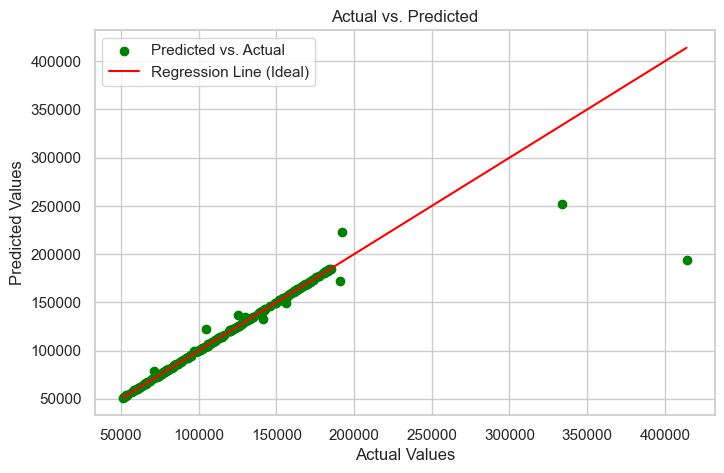

In [157]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color="green", label="Predicted vs. Actual")

# Plot regression line (y = x) for visual comparison
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="red", label="Regression Line (Ideal)")

# Add labels and legend
plt.title("Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

# Show plot
plt.show()


## LAUNCHING MODEL IN STREAMLIT

In [158]:
import pickle

# Save the trained model to a file
with open('company_profits.pkl', 'wb') as file:
    pickle.dump(model, file)




In [159]:
# Load the model from the file
with open('company_profits.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test the loaded model
predicted_profit = loaded_model.predict(X_test.iloc[0:1])
print(f"Predicted Profit: {predicted_profit}")


Predicted Profit: [170473.16128986]
